<a href="https://colab.research.google.com/github/shinmiura/diveintocode-ml/blob/master/%E3%82%A2%E3%83%A4%E3%83%A1%E3%81%AE%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

テキストの目的

・データ分析の基本的な流れを知る

・データ分析ライブラリのPandasに慣れる

どのように学ぶか

定番のデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。


これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。

setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。


1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。



データセットの準備

scikit-learnという機械学習ライブラリにはirisデータセットが用意されているため、これを使用します。

【問題1】データの取得

以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。


sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation


データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。


pandas.DataFrame — pandas 0.24.2 documentation

In [1]:
# irisデータセット読み込み
from sklearn import datasets
from sklearn import svm

In [2]:
iris = datasets.load_iris()

print(iris.data)
print(iris.data.shape)
print(len(iris.data))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [4]:
import pandas as pd

In [5]:
X = pd.DataFrame(iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#list1 = [0 for i in range(150)]
#y = pd.DataFrame(data = list1, columns = ['Species'])
#y


In [7]:
y = pd.DataFrame(iris.target, columns = ["Species"])
y.tail()

,Species
145,2
146,2
147,2
148,2
149,2


In [8]:
display(X)
display(y)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


【問題2】データの結合

問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [9]:
df = pd.concat([X, y], axis = 1)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
df = pd.merge(X, y, left_index=True, right_index=True)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


【問題3】データの確認

今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。


・先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）

・ラベルごとのサンプル数の合計を出力する。

・特徴量に欠損値があるかを確認する。

・特徴量の平均値と標準偏差、四分位数を一度に表示させる。


DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。



In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  5 non-null      float64
 1   sepal_width   5 non-null      float64
 2   petal_length  5 non-null      float64
 3   petal_width   5 non-null      float64
 4   Species       5 non-null      int64  
dtypes: float64(4), int64(1)
memory usage: 328.0 bytes


In [13]:
label_0 = df["Species"] == 0 
label_1 = df["Species"] == 1
label_2 = df["Species"] == 2

label_total = df["Species"].value_counts()
display(label_total)

label_total2 = df.Species.value_counts()
display(label_total2)

2    50
1    50
0    50
Name: Species, dtype: int64

2    50
1    50
0    50
Name: Species, dtype: int64

In [14]:
#df.sum()

In [15]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [16]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


【問題4】irisデータセット自体の調査

ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

【問題5】必要なデータを抽出

DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。


・sepal_widthの列を３つの異なる方法で抽出する

・50番目から99番目までのデータを抽出する

・petal_lengthの列の50番目から99番目までのデータを抽出する

・petal_widthの値が0.2のデータを抽出する

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。



In [17]:
#列名で直接指定
display(df["sepal_width"].head())

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

In [18]:
display(df.loc[:, "sepal_width"].head())

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

In [19]:
display(df.iloc[:, 1].head())

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

In [20]:
# 50番目から99番目までのデータを抽出
display(df[50:100])

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [21]:
# petal_lengthの50番目から99番目までのデータを抽出
display(df["petal_length"][50:100])

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

In [22]:
# petal_widthの値が0.2までのデータを抽出
display(df[df["petal_width"] == 0.2])

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


In [23]:
# df.queryを用いた場合（上記とやりたいことは同じ）
df.query("petal_width == 0.2")

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


【問題6】図の作成

データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。


・ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

・特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

・特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。



In [24]:
# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

(-1.1000000098602216,
 1.1000000262939185,
 -1.100000018898756,
 1.1000000353324482)

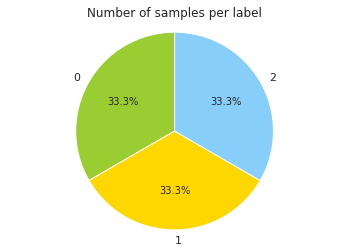

In [25]:
# ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
labels = ['0', '1', '2']
colors = ['yellowgreen', 'gold', 'lightskyblue']

label_classification = df["Species"].value_counts()

plt.title('Number of samples per label')
# 円グラフを表示
plt.pie(label_classification, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90)
# 円を丸く描画
plt.axis('equal')

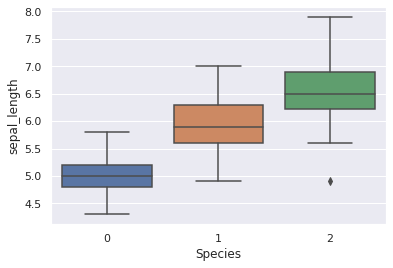

In [26]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
sns.boxplot(x = "Species", y = "sepal_length", data = df)

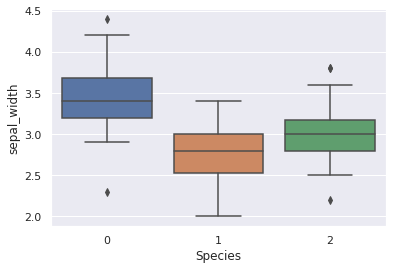

In [27]:
sns.boxplot(x = "Species", y = "sepal_width", data = df)

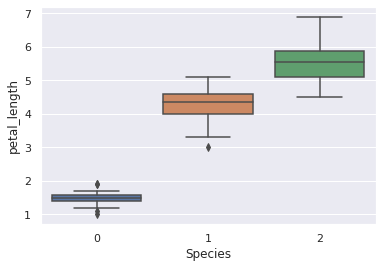

In [28]:
sns.boxplot(x = "Species", y = "petal_length", data = df)

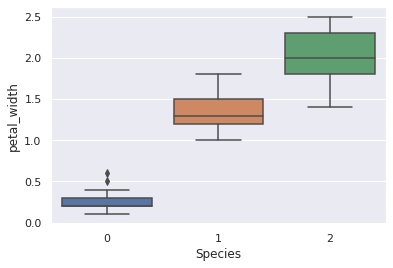

In [29]:
sns.boxplot(x = "Species", y = "petal_width", data = df)

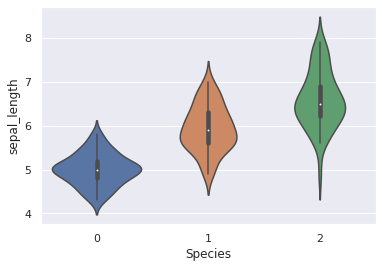

In [30]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
sns.violinplot(x = "Species", y = "sepal_length", data = df)

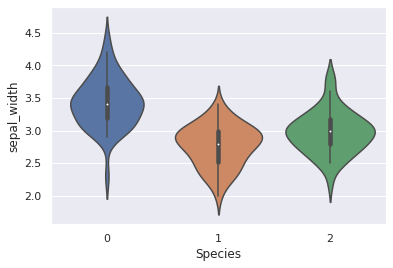

In [31]:
sns.violinplot(x = "Species", y = "sepal_width", data = df)

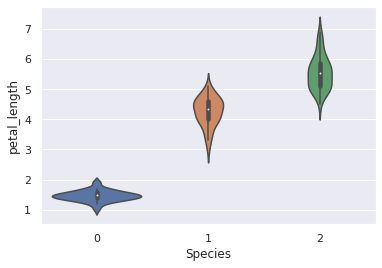

In [32]:
sns.violinplot(x = "Species", y = "petal_length", data = df)

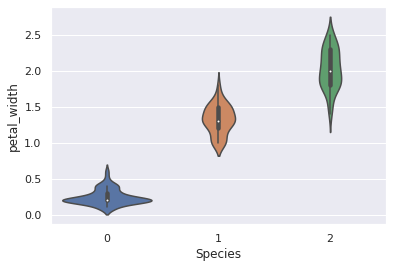

In [33]:
sns.violinplot(x = "Species", y = "petal_width", data = df)

【問題7】特徴量間の関係の確認

特徴量間の関係を見ていきます。次の4つを行ってください。


・４つの特徴量から２つ選ぶようなすべての組み合わせ（６つ）の散布図を種類ごとに色分けして作る。

以下の図はそのうち一つの例です。


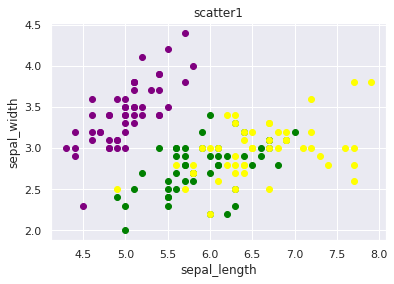

In [34]:
x_0 = df[df.Species == 0].iloc[:, 0]
x_1 = df[df.Species == 1].iloc[:, 0]
x_2 = df[df.Species == 2].iloc[:, 0]

y_0 = df[df.Species == 0].iloc[:, 1]
y_1 = df[df.Species == 1].iloc[:, 1]
y_2 = df[df.Species == 2].iloc[:, 1]

# 散布図
plt.title("scatter1")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.scatter(x_0, y_0, c ="purple")
plt.scatter(x_1, y_1, c ="green")
plt.scatter(x_2, y_2, c ="yellow")

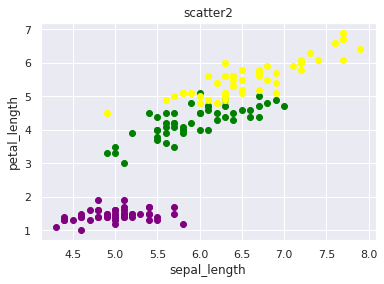

In [35]:
x_0 = df[df.Species == 0].iloc[:, 0]
x_1 = df[df.Species == 1].iloc[:, 0]
x_2 = df[df.Species == 2].iloc[:, 0]

y_0 = df[df.Species == 0].iloc[:, 2]
y_1 = df[df.Species == 1].iloc[:, 2]
y_2 = df[df.Species == 2].iloc[:, 2]

# 散布図
plt.title("scatter2")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.scatter(x_0, y_0, c ="purple")
plt.scatter(x_1, y_1, c ="green")
plt.scatter(x_2, y_2, c ="yellow")

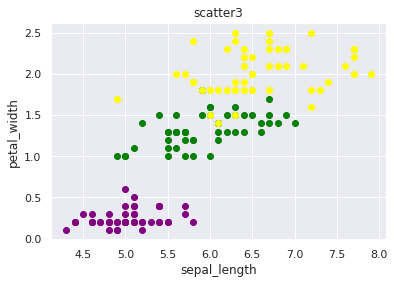

In [36]:
x_0 = df[df.Species == 0].iloc[:, 0]
x_1 = df[df.Species == 1].iloc[:, 0]
x_2 = df[df.Species == 2].iloc[:, 0]

y_0 = df[df.Species == 0].iloc[:, 3]
y_1 = df[df.Species == 1].iloc[:, 3]
y_2 = df[df.Species == 2].iloc[:, 3]

# 散布図
plt.title("scatter3")
plt.xlabel("sepal_length")
plt.ylabel("petal_width")
plt.scatter(x_0, y_0, c ="purple")
plt.scatter(x_1, y_1, c ="green")
plt.scatter(x_2, y_2, c ="yellow")

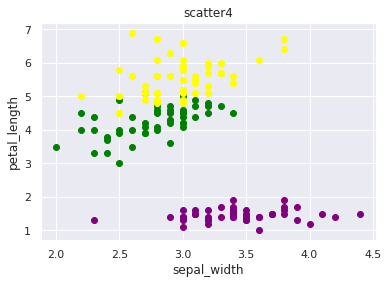

In [37]:
x_0 = df[df.Species == 0].iloc[:, 1]
x_1 = df[df.Species == 1].iloc[:, 1]
x_2 = df[df.Species == 2].iloc[:, 1]

y_0 = df[df.Species == 0].iloc[:, 2]
y_1 = df[df.Species == 1].iloc[:, 2]
y_2 = df[df.Species == 2].iloc[:, 2]

# 散布図
plt.title("scatter4")
plt.xlabel("sepal_width")
plt.ylabel("petal_length")
plt.scatter(x_0, y_0, c ="purple")
plt.scatter(x_1, y_1, c ="green")
plt.scatter(x_2, y_2, c ="yellow")

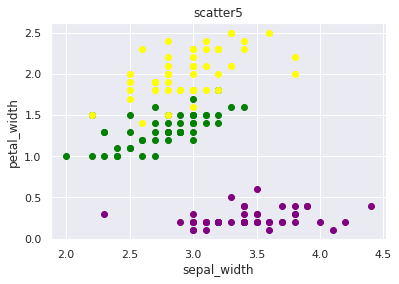

In [38]:
x_0 = df[df.Species == 0].iloc[:, 1]
x_1 = df[df.Species == 1].iloc[:, 1]
x_2 = df[df.Species == 2].iloc[:, 1]

y_0 = df[df.Species == 0].iloc[:, 3]
y_1 = df[df.Species == 1].iloc[:, 3]
y_2 = df[df.Species == 2].iloc[:, 3]

# 散布図
plt.title("scatter5")
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.scatter(x_0, y_0, c ="purple")
plt.scatter(x_1, y_1, c ="green")
plt.scatter(x_2, y_2, c ="yellow")

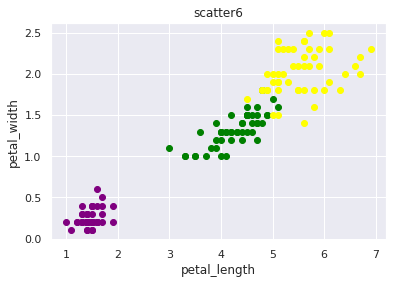

In [39]:
x_0 = df[df.Species == 0].iloc[:, 2]
x_1 = df[df.Species == 1].iloc[:, 2]
x_2 = df[df.Species == 2].iloc[:, 2]

y_0 = df[df.Species == 0].iloc[:, 3]
y_1 = df[df.Species == 1].iloc[:, 3]
y_2 = df[df.Species == 2].iloc[:, 3]

# 散布図
plt.title("scatter6")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.scatter(x_0, y_0, c ="purple")
plt.scatter(x_1, y_1, c ="green")
plt.scatter(x_2, y_2, c ="yellow")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 144x144 with 0 Axes>

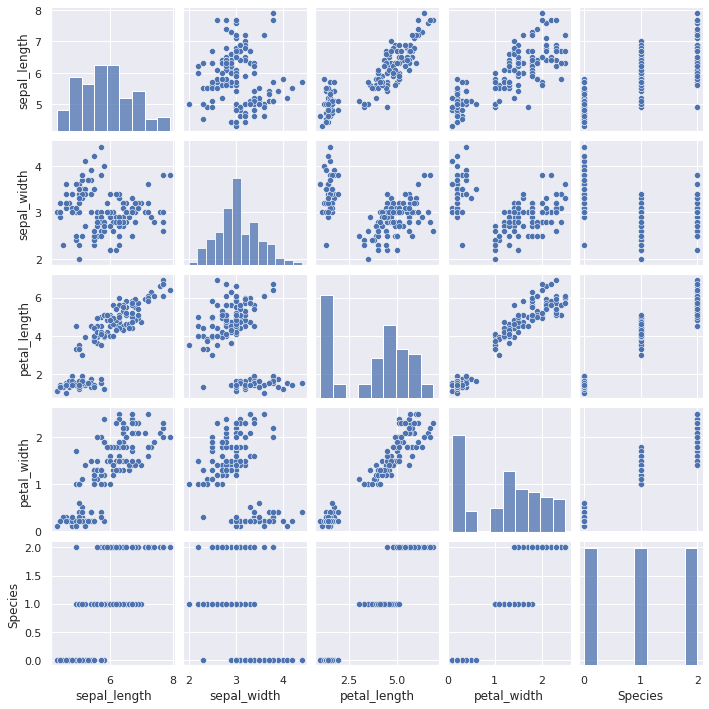

In [40]:
# すべての特徴量の組み合わせを一度に表示させた、散布図行列を作る。
plt.figure(figsize=(2, 2))
all_combinations = sns.pairplot(df, size= 2.0)
all_combinations

In [41]:
# ４つの特徴量に関する相関係数行列を作る
cm_four_features = df.iloc[:, :4].corr()
cm_four_features

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


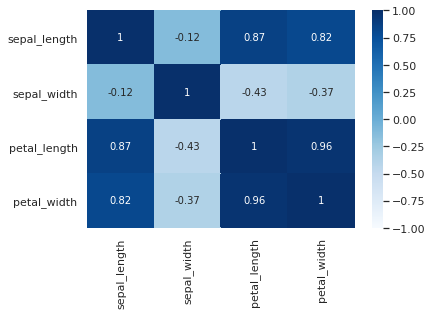

In [42]:
# 相関係数行列のヒートマップ
sns.heatmap(cm_four_features, vmin = -1, vmax = 1, cmap = "Blues", linecolor = "white", annot = True)
plt.show()

【問題8】可視化したグラフや表の結果の説明

データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。


例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。



問題８における考察を以下に行なった。

label0のアヤメは、petal_lengthとpetal_widthが非常に短いという顕著な特徴が見られた。

petal_lengthと　petal_widthは0.96という強い正の相関関係があるのに対し、sepal_lengthとsepal_widthは-0.12という負の相関関係になっている。逆に、sepal_lengthは、　petal-lengthと0.87petal_widthと0.82という正の相関関係がある。よって、sepal_widthについては他の特徴量との関係を見出しづらかった。

